# PyObject:  Object-oriented programming HW

## Exercise 1  (from Monday's class)

1. Write a ``Particle`` class that can be used to represent a particle with a mass, a 3-d position, and a 3-d velocity.

2. Write a method that can be used to compute the kinetic energy of the particle

3. Write a method that takes another particle as an argument and finds the distance between the two particles

4. Write a method that given a time interval ``dt`` will update the position of the particle to the new position based on the current position and velocity.

5. Write a ``ChargedParticle`` class that inherits from the ``Particle`` class, but also has an attribute for the charge of the particle.


In [ ]:
import numpy as np
# your solution here

class ChargedParticle(Particle):

    def __init__(self, mass, x, y, z, vx, vy, vz, charge):
        self.mass = mass
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.charge = charge


In [44]:
class Particle(object):
    def __init__(self, x,y,z, vx,vy,vz, m):
        self.x = x
        self.y = y
        self.z = z
        
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.v = (vx**2 + vy**2 + vz**2)**0.5
        
        self.m = m
        
        self.K = 0.5 * m * (vx**2 + vy**2 + vz**2)
        
    def distance_from(self, other):
        return ((self.x - other.x)**2 + (self.y - other.y)**2 + (self.z - other.z)**2)**0.5
    
    def advance(self, dt, announce=False):
        self.x += self.vx * dt
        self.y += self.vy * dt
        self.z += self.vz * dt
        if announce==True:
            print(str(dt) + " time intervals pass")
            
    def charge_interaction(self, other, time=0):
        interaction = False
        if(self.distance_from(other) < 0.25):
            if((self.q < 0 and other.q > 0) or (self.q > 0 and other.q < 0)):
                interaction = True
                self.q = 0
                self.vx = 0
                self.vy = 0
                self.vz = 0
                other.q = 0
                other.vx = 0
                other.vy = 0
                other.vz = 0
                print("merge")
            elif((self.q < 0 and other.q < 0) or (self.q > 0 and other.q > 0)):
                interaction = True
                self.vx *= -1 * (self.q/other.q) * (self.m/other.m)
                self.vy *= -1 * (self.q/other.q) * (self.m/other.m)
                self.vz *= -1 * (self.q/other.q) * (self.m/other.m)
                other.vx *= -1 * (other.q/self.q) * (other.m/self.m)
                other.vy *= -1 * (other.q/self.q) * (other.m/self.m)
                other.vz *= -1 * (other.q/self.q) * (other.m/self.m)
                print("repel")
        if interaction:
            print("interaction at time = " + str(time))
        
    def position(self):
        print(self.x, self.y, self.z)
    def velocity(self):
        print(self.vx, self.vy, self.vz)
        
class ChargedParticle(Particle):
    def __init__(self, x,y,z, vx,vy,vz, m, q):
        Particle.__init__(self, x,y,z, vx,vy,vz, m)
        self.q = q

## Exercise 2  (New)

6. Write a method that can be used to see if a particle is in the same place (e.g., find_seperation < 0.25).  If there are two ChargedParticles in the same place make a "simple" (*not correct physics*) "interaction". (__have the code print "interaction"__).   

    a. If the charges are opposite, make them "combine", set both velocities to zero and set their charge to zero, and print "merge".

    b. Else, make the particles "repel", to do:
    
        multiply each "self" velocity and  by (-1 * (self.charge+other.charge) * (self.mass/other.mass))  
    
        multiply each "other" velocity by (-1 * (self.charge+other.charge) * (other.mass/self.mass)) 
    
    e.g., reversing it's velocity, and print "repel". __(Again this is bad physics, but we are focusing on coding so play along.)__


7. To test the above, write a code with two particles starting:

        P1 at (x,y,z) = (-5,-5,-5) with (vx,vy,vz) = (1,1,1) and (charge = 0.5) 

        P2 at (x,y,z) = (5,5,5) with (vx,vy,vz) = (-1,-1,-1) and (charge = -0.5).  

    Use your dt time interval to move the particles in 0.25 time steps for 100 steps, and print the current poition and velocity of each particle at each time step.  
    

8. To test the above, write a code with two particles starting: 

        P1 at (x,y,z) = (-5,-5,-5) with (vx,vy,vz) = (2,2,2) and (charge = 0.5) 

        P2 at (x,y,z) = (5,5,5) with (vx,vy,vz) = (-2,-2,-2) and (charge = 2.0).  

    Use your dt time interval to move the particles in 0.25 time steps for 100 steps, and print the current poition and velocity of each particle at each time step.  


<IPython.core.display.Javascript object>


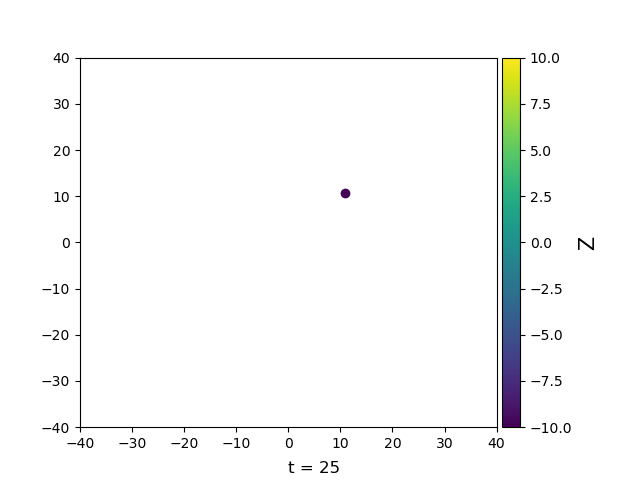

C:\Users\royal\AppData\Local\Temp\ipykernel_16684\1777564112.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  bar = fig.colorbar(ScalarMappable(norm=Normalize(-10,10),cmap='viridis'),orientation="vertical",pad=0.01)


repel
interaction at time = 2.5


In [52]:
%matplotlib notebook
from time import sleep
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

universal_time = 0
particles = []

fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlim(-10,10)
plt.ylim(-10,10)

bar = fig.colorbar(ScalarMappable(norm=Normalize(-10,10),cmap='viridis'),orientation="vertical",pad=0.01)
bar.set_label('Z',size=15)

ax.set_xlabel("X",size=20)
ax.set_ylabel("Y",size=20)

P1 = ChargedParticle(-5,-5,-5, 2,2,2, 50, 0.5)
P2 = ChargedParticle(5,5,5, -2,-2,-2, 3, 2.0)    

plt.show()

for i in range(100):
    P1.charge_interaction(P2, universal_time)
    
    P1.advance(0.25)
    P2.advance(0.25)
    universal_time += 0.25
    
    particles = []
    particles.append((P1.x,P1.y,P1.z))
    particles.append((P2.x,P2.y,P2.z))
    
    ax.clear()
    for p in particles:
        ax.scatter(p[0], p[1], c=p[2], cmap="viridis")
    ax.text(0,-50, "t = " + str(int(universal_time)),size=12)
    
    plt.xlim(-40,40)
    plt.ylim(-40,40)
    fig.canvas.draw()
    
    #sleep(0.05)
    
    
            
        
        #having trouble mapping Z axis to color, idk what I'm doing wrong

<IPython.core.display.Javascript object>


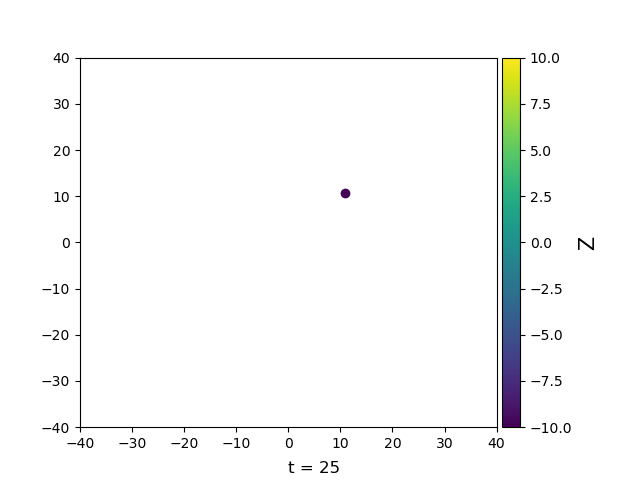

C:\Users\royal\AppData\Local\Temp\ipykernel_16684\441461797.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  bar = fig.colorbar(ScalarMappable(norm=Normalize(-10,10),cmap='viridis'),orientation="vertical",pad=0.01)


repel
interaction at time = 2.5


In [59]:
%matplotlib notebook
from time import sleep
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

universal_time = 0
particles = []

fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlim(-10,10)
plt.ylim(-10,10)

bar = fig.colorbar(ScalarMappable(norm=Normalize(-10,10),cmap='viridis'),orientation="vertical",pad=0.01)
bar.set_label('Z',size=15)

ax.set_xlabel("X",size=20)
ax.set_ylabel("Y",size=20)

P1 = ChargedParticle(-5,-5,-5, 2,2,2, 50, 0.5)
P2 = ChargedParticle(5,5,5, -2,-2,-2, 3, 2.0) 
P3 = ChargedParticle(-1,-10,0, 0,3.2,0, 150, 3.0)

plt.show()

for i in range(100):
    P1.charge_interaction(P2, universal_time)
    P1.charge_interaction(P3, universal_time)
    P2.charge_interaction(P3, universal_time)
    
    P1.advance(0.25)
    P2.advance(0.25)
    P3.advance(0.25)
    universal_time += 0.25
    
    particles = []
    particles.append((P1.x,P1.y,P1.z))
    particles.append((P2.x,P2.y,P2.z))
    particles.append((P3.x,P3.y,P3.z))
    
    ax.clear()
    for p in particles:
        ax.scatter(p[0], p[1], c=p[2], cmap="viridis")
    ax.text(0,-50, "t = " + str(int(universal_time)),size=12)
    
    plt.xlim(-40,40)
    plt.ylim(-40,40)
    fig.canvas.draw()
    
    #sleep(0.05)
    
    
            #I feel like the interactions should be different but idk